## 비지도 확습은 PCA가 최고 성능을 가지고 있다.
PCA
클러스터링
앙상블 러닝



## PCA(Principal Component Analysis)의 이해

- pca와 truncated svd는 같은 차원을 축소해서 같은 전처리를 하고 두가지 방법을 모두 쓸수 있지만
추천 시스템을 제외한 방법에서는 pca가 더 정확한 복원률을 가지고 있다.


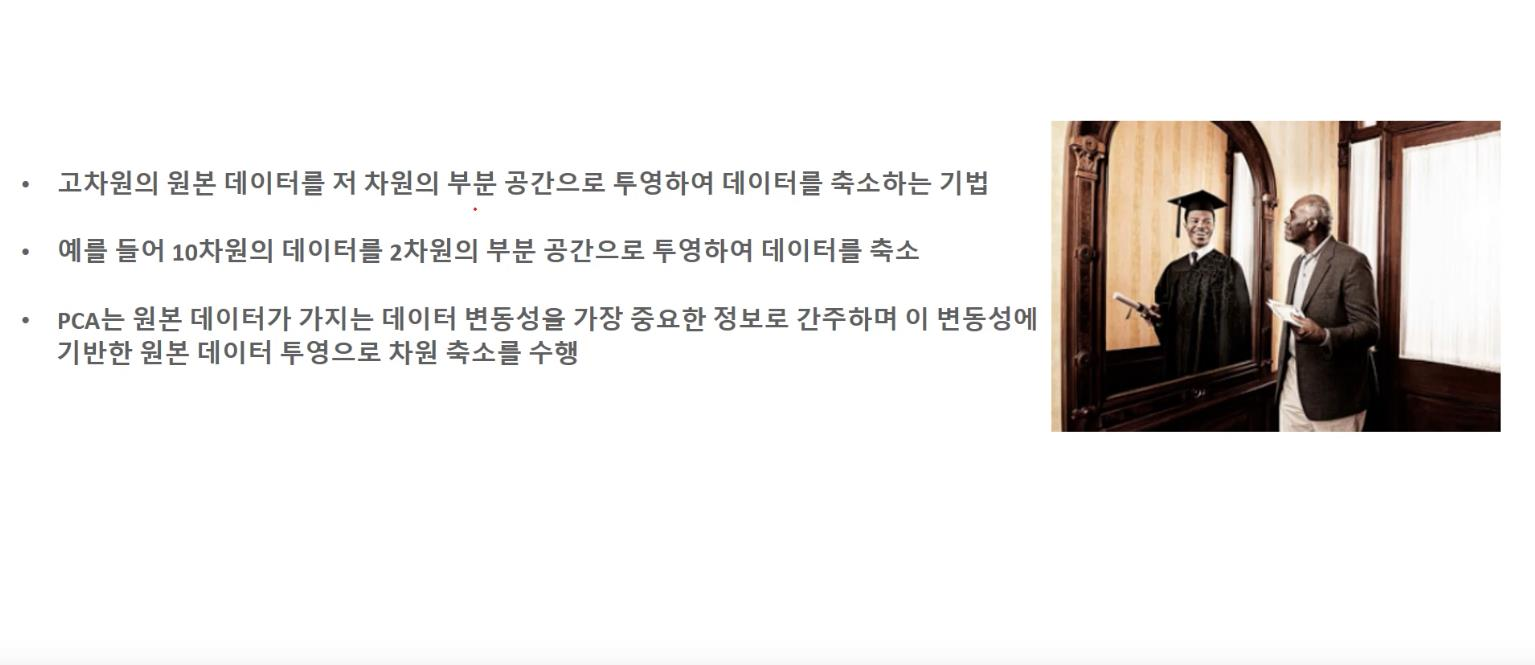

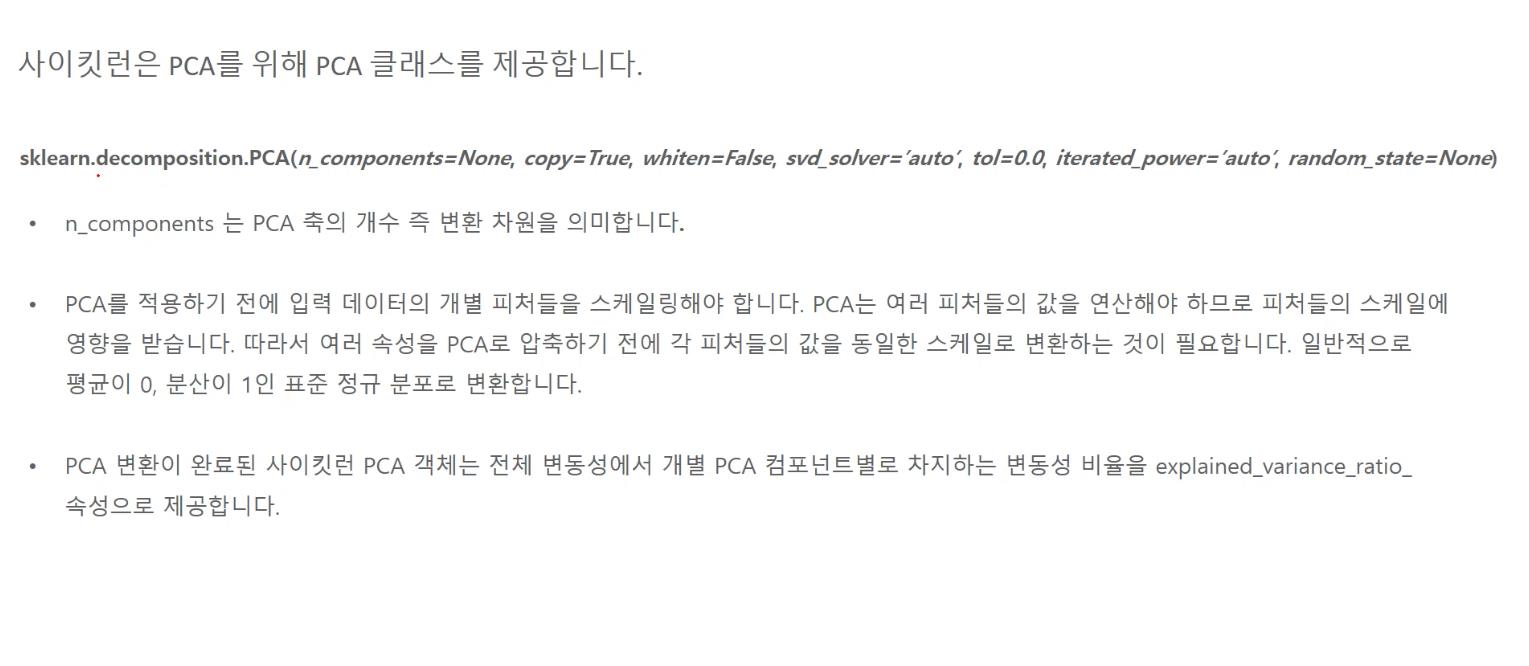PCA

In [151]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns =['sepal_length','sepal_width','petal_length','petar_width']
irisDF= pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head()


,sepal_length,sepal_width,petal_length,petar_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


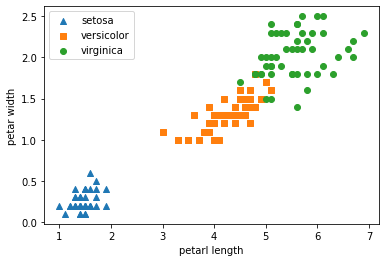

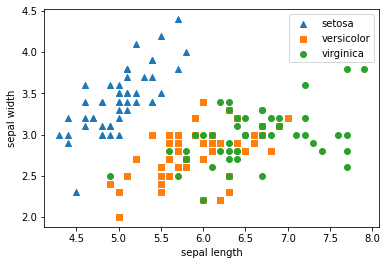

In [135]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['petal_length']
    y_axis_data = irisDF[irisDF['target']==i]['petar_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])
irisDF.head()
plt.legend()
plt.xlabel('petarl length')
plt.ylabel('petar width')
plt.show()


for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])
irisDF.head()
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [149]:

from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF)
iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.22474487e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.22474487e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

## StandardScaler()을 하는 이유
### # 사진을 자세히 보시면 원본 데이터 값은 x가 10~15 값을 가집니다.
### 이를 스케일 조정을 해준겁니다. (#MinMax 보시면 0~1의 값을 가지는게 보이시죠)
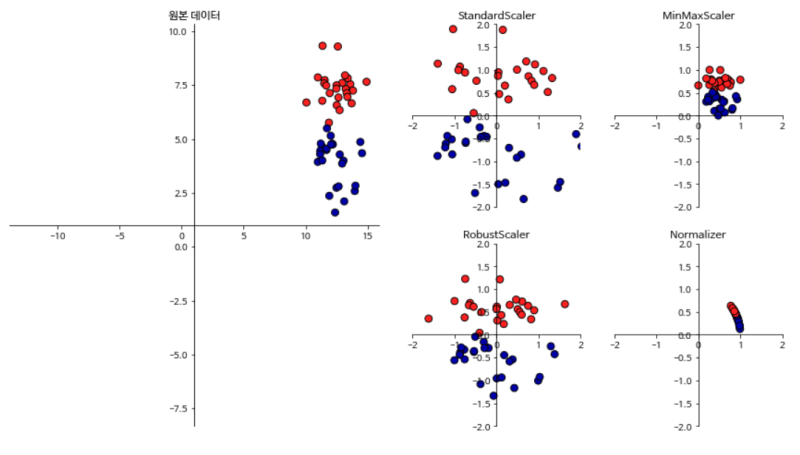

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 몇차원으로 할것인가??

#fit()과 transfor()을 호출하여 pca변환 데이터 변환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# 차원이 2차원으로 변환하는 것을 확인할수 있다
print(iris_pca.shape)


(150, 2)
(150, 5)


In [155]:
#pca 변환된 데이터의 컬럼명을 각각 pca_component_1 ,pca_component_2로 정정

pca_columns = ['pca_component_1' ,'pca_component_2']

irisDF_pca = pd.DataFrame(iris_pca, columns= pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0
3,-2.601991,-0.603306,0
4,-2.683744,0.640220,0



-  처음 가져온 데이터셋 shape는 (150, 5)에서  pca 이후 shape는 (150, 2)인것이 확인됬다.

In [ ]:
### PCA 수행 

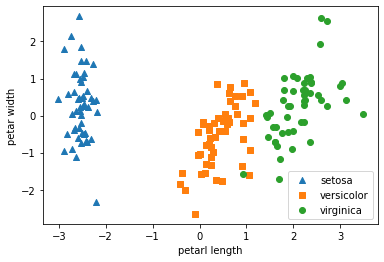

In [158]:
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])
irisDF.head()
plt.legend()
plt.xlabel('petarl length')
plt.ylabel('petar width')
plt.show()


#### 원본 데이터 vs PCA 데이터 간 예측성능 비교

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf  = RandomForestClassifier(random_state=156)

#원본


scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy',cv =3)
print(scores)

print(np.mean(scores))

[0.98 0.94 0.96]
0.96


### PCA 수행하니 예측 성능이 증가했다


In [163]:
pca_x = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca= cross_val_score(rcf, pca_x, iris.target, scoring='accuracy', cv=3)
print(scores_pca)
print(np.mean(scores_pca))

[0.98 0.98 1.  ]
0.9866666666666667


실습 : 신용카드 연체 예측 데이터 PCA
신용카드 연체 예측 (UCI credit card default data)


In [167]:
import pandas as pd
card = pd.read_excel('06_credit_card.xls',header =1 , sheet_name='Data').iloc[0:,1:]
card.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [169]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [171]:
card.rename(columns ={'PAY_0':'PAY_1','default payment next month':'default' },inplace=True)


#속성과 클래스로 데이터 분류
y_target = card['default']
X_features =card.drop(['default'],axis=1)

y_target.value_counts()

0    23364
1     6636
Name: default, dtype: int64

<AxesSubplot:>

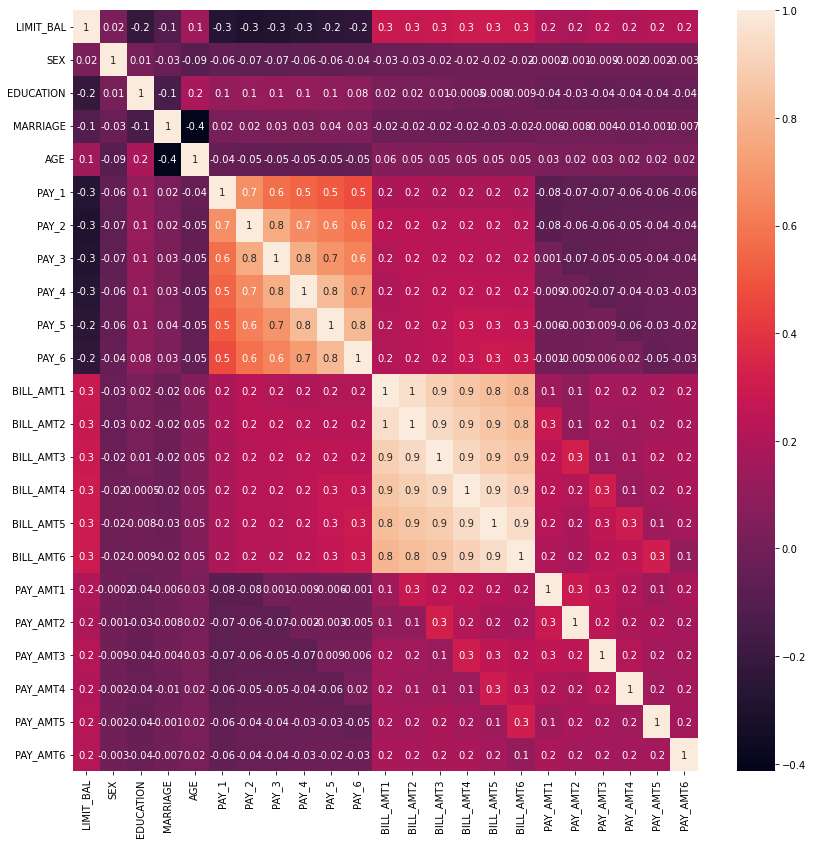

In [176]:
import seaborn as sns
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14)) 
sns.heatmap(corr, annot=True, fmt = '.1g')  # fmt - 정밀도

In [178]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성', pca.explained_variance_ratio_)


대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 [0.90555253 0.0509867 ]


 - 6개의 피처를 2개의 피처로 PCA 변환했을 때 첫번째 컴포넌트가 전체 변동성의 90%를 설명한다

전체 피처들 PCA 변환(n_components=6)
전체 원본데이터와 pca변환한 데이터간의 랜덤 포레스트 예측 성능 비교

In [ ]:
## 원본 데이터의 성능

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf  = RandomForestClassifier(n_estimators=6,random_state=156)

#원본
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy',cv=3)
print('CV=3의 경우 개별 FOLD세트별 정확도',scores)

print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3의 경우 개별 FOLD세트별 정확도 [0.7951 0.8022 0.8076]
평균 정확도:0.8016


In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf  = RandomForestClassifier(n_estimators=6,random_state=156)


# PCA 부분
scaler = StandardScaler()
df_scaler= scaler.fit_transform(X_features)
pca = PCA(n_components=7)
df_pca = pca.fit_transform(df_scaler)
# 여기 까지


a
scores_df = cross_val_score(rcf, df_pca, y_target, scoring='accuracy',cv=3)
print('CV=3의 경우의 PCA 변환된  개별 FOLD세트별 정확도',scores_df)

print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_df)))

CV=3의 경우의 PCA 변환된  개별 FOLD세트별 정확도 [0.7866 0.784  0.7899]
PCA 변환 데이터 셋 평균 정확도:0.7868


## LDA

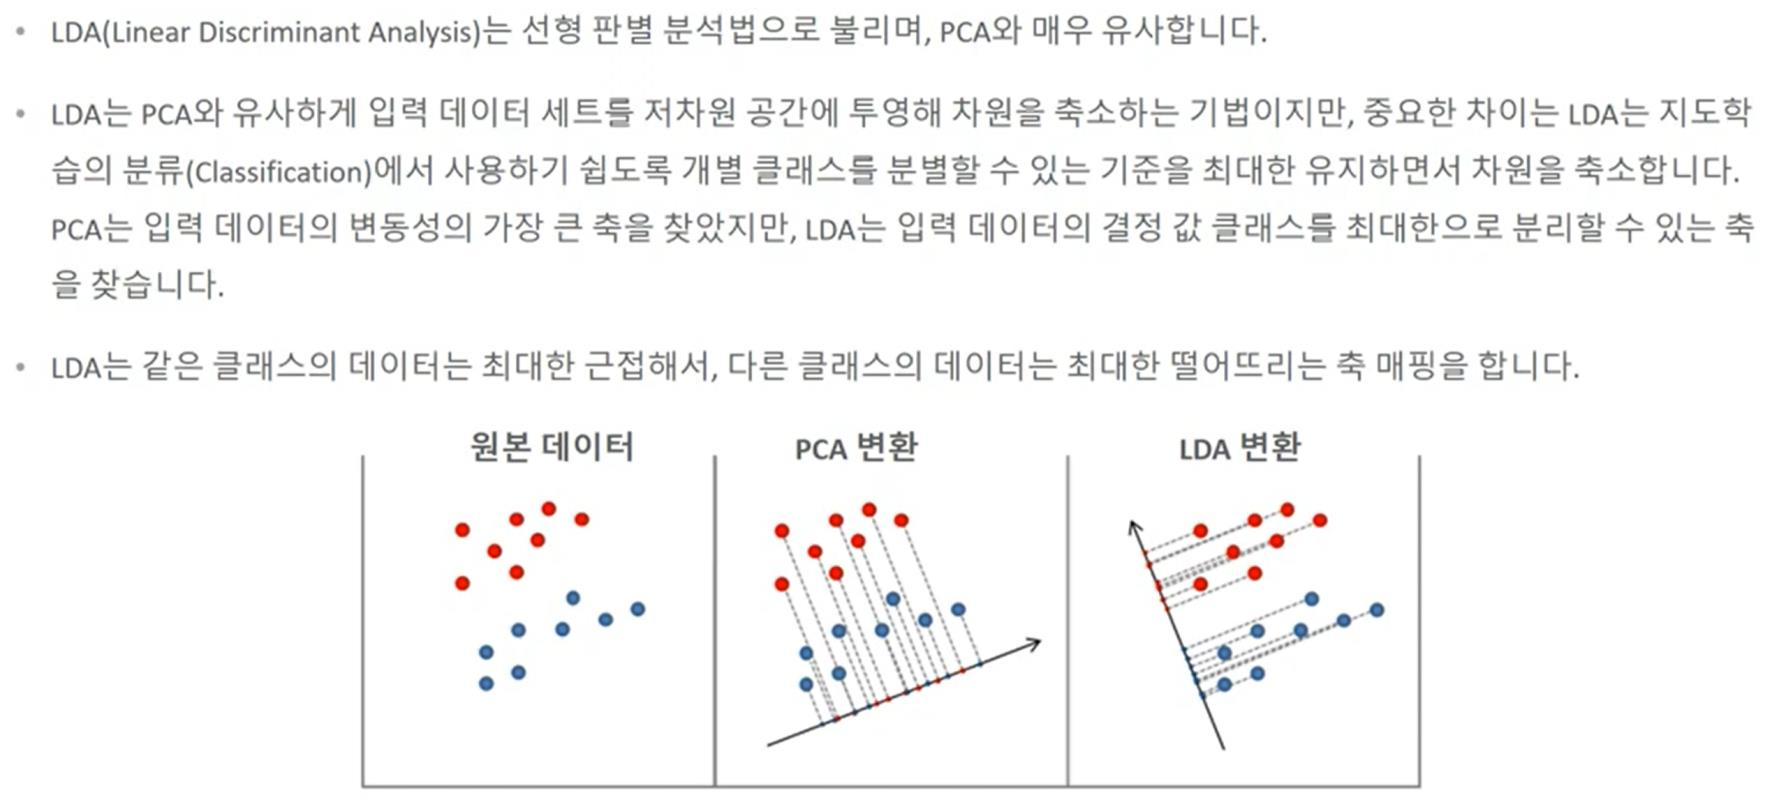

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)


In [6]:
lda =LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


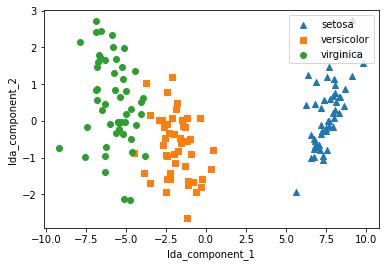

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## 특이값 분해 SVD

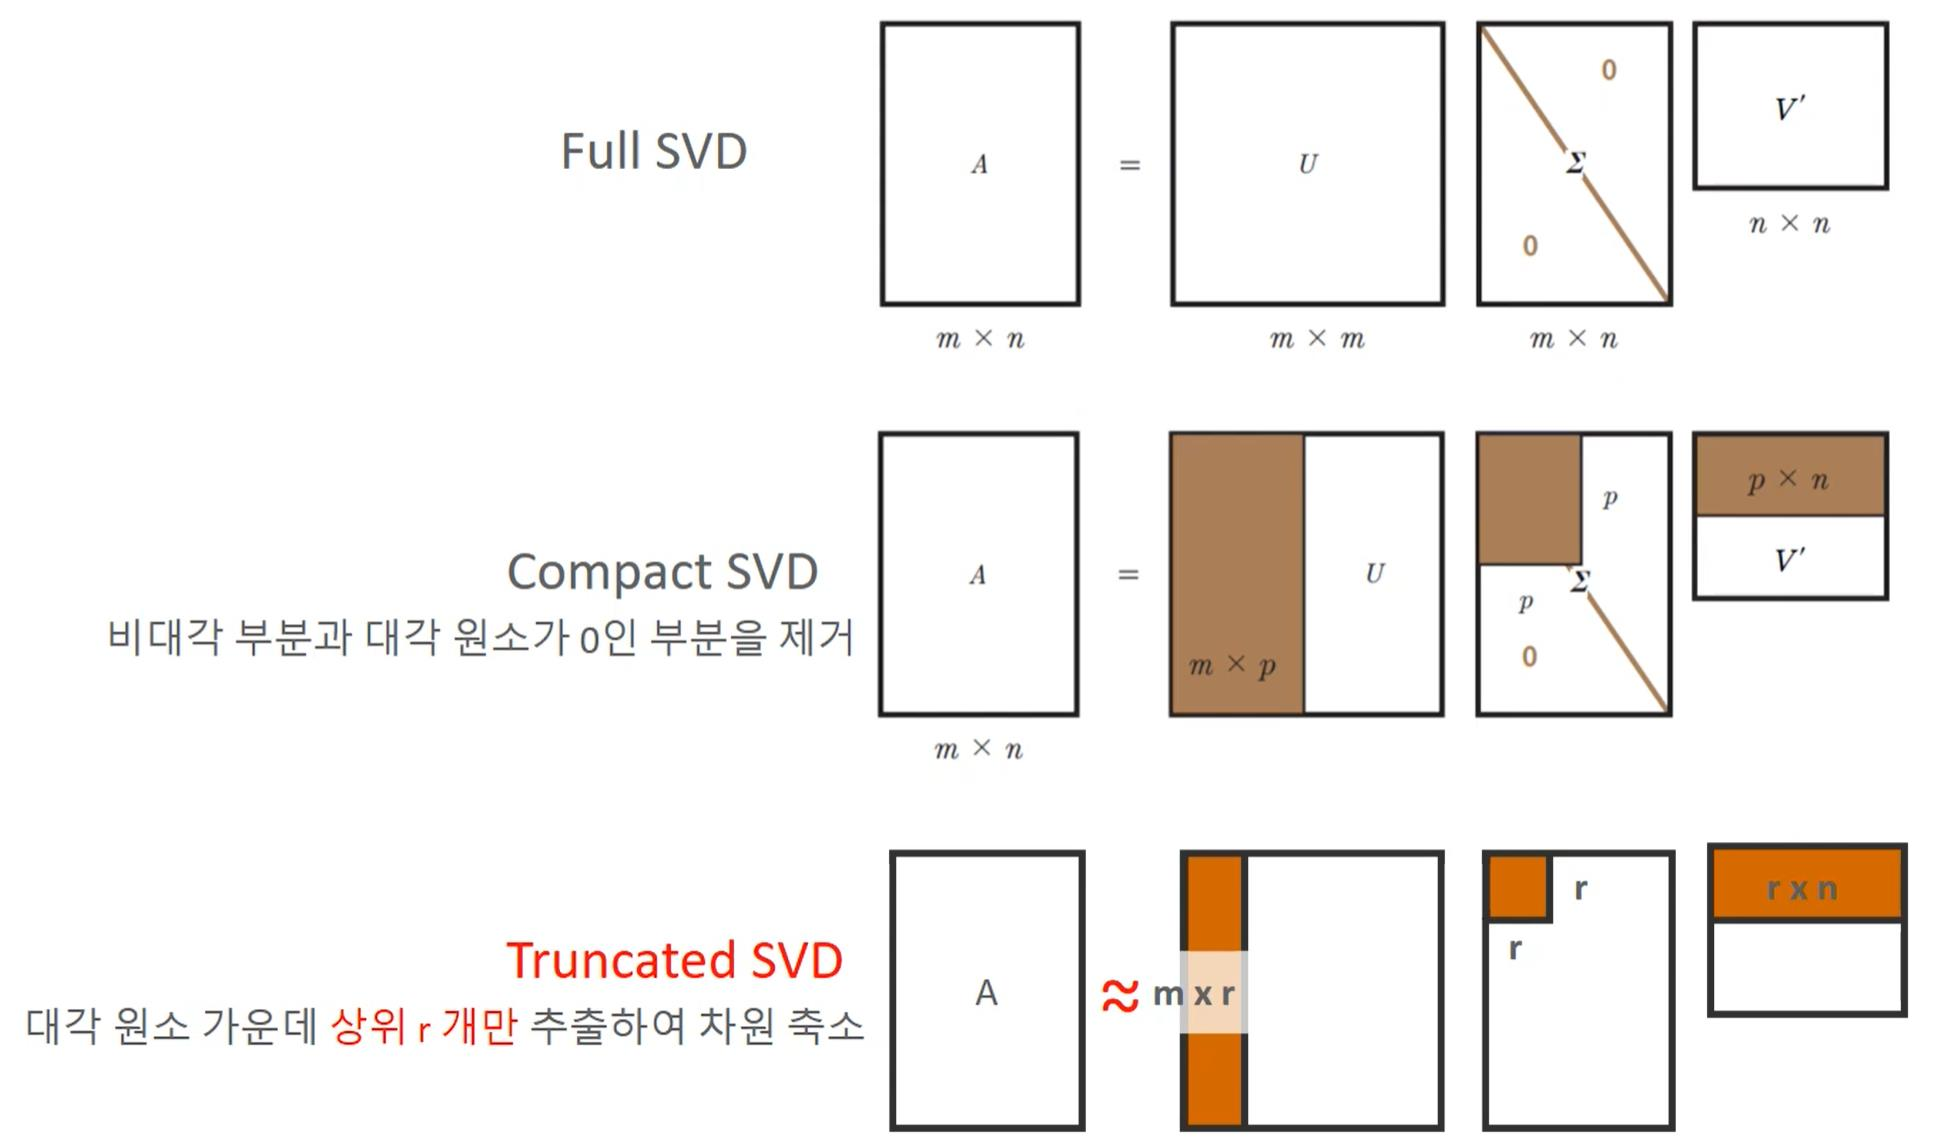

### SVD는 데이터의 패턴을 분석하여 중요 패턴(잠재요소) 가져온다.
- TRUCATE svd 는 기존 데이터의 10퍼센트의 데이터를 가지고 기존데이터를 비슷하게 만들수 있다. (복원 시 중요한 부분만 가져온다.)
   - 쇼핑 사이트에서 나의 검색패턴을 분석해 다른 종류의 비슷한 물건을 추천해주는 시스템

- COMpact SCD는 50%로 정도만 제거한 후 복원한다, (기존파일을 압축 파일로 변경 후 다시 축해제를 하여도 데이터는 동일한 방법)

### SVD 활용
- 이미지 압축/ 변환
- 추천 엔진
- 문서잠재의미분석
- 의사 역행렬을 통한 모델 예측

#### 숫자 1의 사진을 입력시켜 SVD하면  인풋 100 ->  인코드 50 ->  패턴 2개 > 디코드 50 아웃픗 100  
- 예측 1과 비슷하게 생긴 다른 숫자 1사진이 나온다

EX> 내 얼굴 사진을 넣으면 나와 비슷하게 생긴 얼굴사진이 나온다.


#### SVD 실습 하기
### 기존 데이터 

In [116]:
import numpy as np
from numpy.linalg import svd

np.random.seed(11)
a=np.random.randn(4,4) #4개의 리스트  리스트 하나에 원소 4개까지  shape(4,4)
print(np.round(a,3)) # 소수점 3번쨰 까지 출력

[[ 1.749 -0.286 -0.485 -2.653]
 [-0.008 -0.32  -0.537  0.315]
 [ 0.421 -1.066 -0.886 -0.476]
 [ 0.69   0.561 -1.306 -1.119]]


In [117]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U,3))
print('Sigma matrix:\n',np.round(Sigma,3))
print('Vt matrix:\n',np.round(Vt,3))



(4, 4) (4,) (4, 4)
U matrix:
 [[-0.859 -0.319  0.333 -0.223]
 [ 0.014  0.493 -0.072 -0.867]
 [-0.261  0.792  0.364  0.416]
 [-0.44   0.169 -0.867  0.161]]
Sigma matrix:
 [3.693 1.39  1.182 0.115]
Vt matrix:
 [[-0.519  0.074  0.329  0.786]
 [-0.08  -0.586 -0.743  0.313]
 [ 0.116 -0.8    0.581 -0.091]
 [-0.843 -0.1   -0.051 -0.526]]


In [119]:
#시그마를 다시 0을 포함한 대칭행렬도 변환
Sigma_mat = np.diag(Sigma)
a_= np.dot(np.dot(U, Sigma_mat),Vt)
print(np.round(a_,3))

[[ 1.749 -0.286 -0.485 -2.653]
 [-0.008 -0.32  -0.537  0.315]
 [ 0.421 -1.066 -0.886 -0.476]
 [ 0.69   0.561 -1.306 -1.119]]


In [121]:
a[2] =a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

# >> 0리스트와 3 리스트가 값이 같게 만들었다.

[[ 1.749 -0.286 -0.485 -2.653]
 [-0.008 -0.32  -0.537  0.315]
 [ 1.741 -0.606 -1.021 -2.338]
 [ 1.749 -0.286 -0.485 -2.653]]


In [122]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)

print('Sigma matrix:\n',np.round(Sigma,3))


(4, 4) (4,) (4, 4)
Sigma matrix:
 [5.517 0.893 0.    0.   ]


In [ ]:
PDF PAGE _ 369페이지 적기

U_ = U[;,2:]
Sigma_ = np.diag(Sigma[:2])

Vt_ = Vt[:2]
print(U_.shape,Sigma_.shape,Vt_.shape )
a_ = np.dot(np.dot())

### Truncated SVD 를 이용한 행렬 분해

## NMF(Non Negative Matric Factorization) 
 - SVD랑 같은 축소법이다.
 - 원소값은 양수여야만 한다. 음수는 불가능 하다.
 

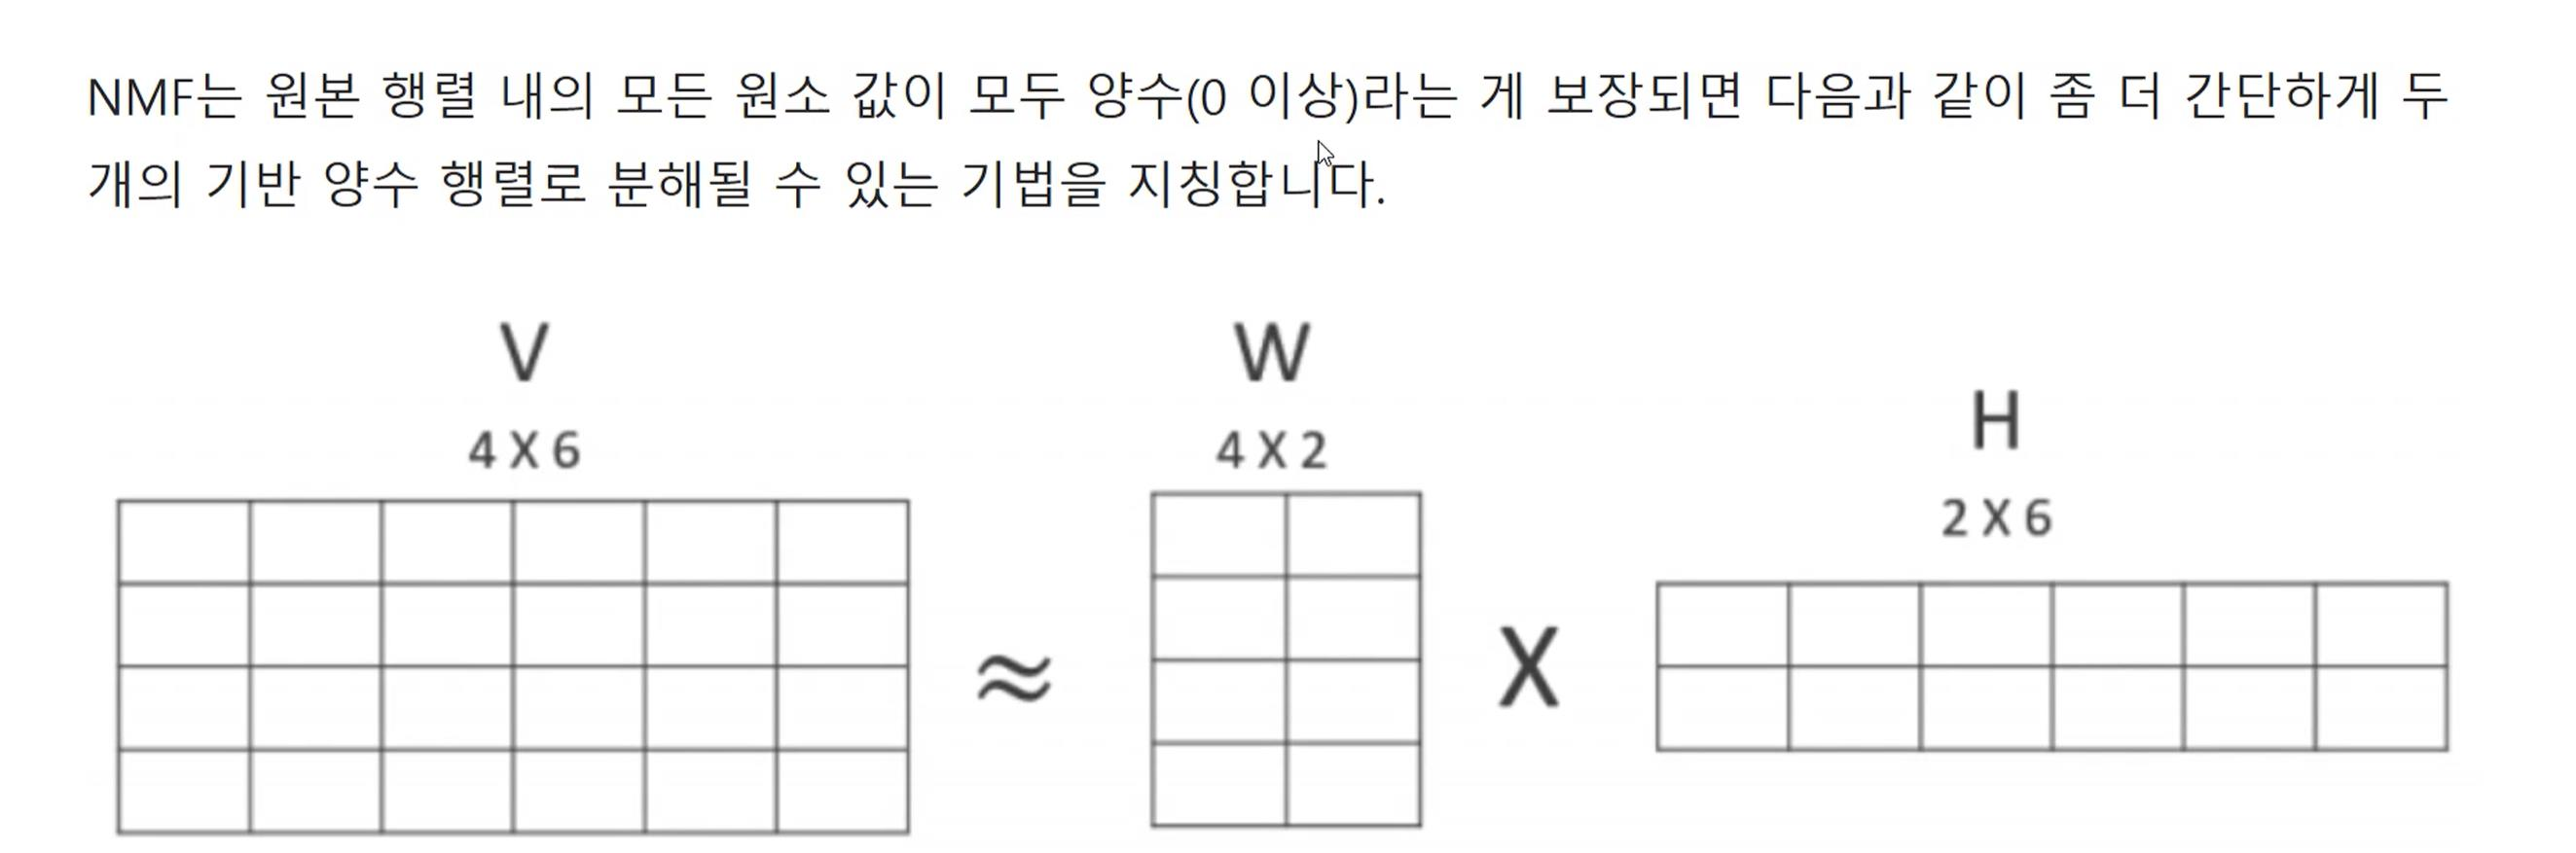